In [1]:
import numpy as np

# Define the Pauli-X gate
X = np.array([[0, 1],
              [1, 0]])

# Function to return the R_y(theta) matrix
def R_y(theta):
    return np.array([[np.cos(theta / 2), -np.sin(theta / 2)],
                     [np.sin(theta / 2), np.cos(theta / 2)]])

# Define theta (angle in radians)
theta = np.pi / 4  # 45 degrees, for example

# Calculate X * R_y(theta) * X
result = X @ R_y(theta) @ X

# Calculate R_y(-theta) for comparison
expected_result = R_y(-theta)

# Print the results
print("X * R_y(theta) * X =\n", result)
print("\nR_y(-theta) =\n", expected_result)

# Verify if they are equal
if np.allclose(result, expected_result):
    print("\nThe matrices are equal, so X is the correct gate Q.")
else:
    print("\nThe matrices are not equal.")


X * R_y(theta) * X =
 [[ 0.92387953  0.38268343]
 [-0.38268343  0.92387953]]

R_y(-theta) =
 [[ 0.92387953  0.38268343]
 [-0.38268343  0.92387953]]

The matrices are equal, so X is the correct gate Q.


In [2]:
import numpy as np
from scipy.linalg import expm

# Define the Pauli matrices
I = np.eye(2)
Z = np.array([[1, 0], [0, -1]])

# Define the Hadamard gate
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

# Rotation matrices
def R_z(alpha):
    return np.array([[np.exp(-1j * alpha / 2), 0],
                     [0, np.exp(1j * alpha / 2)]])

def R_y(theta):
    return np.array([[np.cos(theta / 2), -np.sin(theta / 2)],
                     [np.sin(theta / 2), np.cos(theta / 2)]])

# Given parameters
alpha = np.pi / 2
theta = np.pi / 2

# Calculate H from the decomposition
H_decomposed = R_z(alpha) @ R_y(theta)

# Print the original Hadamard matrix and the decomposed matrix
print("Original Hadamard gate H =\n", H)
print("\nDecomposed H using R_z and R_y =\n", H_decomposed)

# Check if they are identical
if np.allclose(H, H_decomposed):
    print("\nThe matrices are identical. The decomposition is correct.")
else:
    print("\nThe matrices are not identical. There is an error in the decomposition.")


Original Hadamard gate H =
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Decomposed H using R_z and R_y =
 [[ 0.5-0.5j -0.5+0.5j]
 [ 0.5+0.5j  0.5+0.5j]]

The matrices are not identical. There is an error in the decomposition.


In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Function to create a controlled-Hadamard gate using single qubit gates and CNOT
def controlled_hadamard(control, target):
    qc = QuantumCircuit(2)
    
    # Decompose Hadamard into R_z and R_y rotations
    qc.rz(np.pi/2, target)
    qc.ry(np.pi/2, target)
    
    # Apply CNOT gate with the control and target qubits
    qc.cx(control, target)
    
    # Apply inverse rotation gates to restore the qubit's state
    qc.ry(-np.pi/2, target)
    qc.rz(-np.pi/2, target)
    
    return qc

# Initialize the quantum circuit
qc = QuantumCircuit(2)

# Initialize qubits to |0> and |1>
qc.x(1)  # Apply X gate to qubit 1 to initialize to |1>

# Apply controlled-Hadamard with qubit 0 as control and qubit 1 as target
ch = controlled_hadamard(0, 1)
qc.append(ch.to_instruction(), [0, 1])

# Measure the qubits
qc.measure_all()

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the backend
transpiled_circuit = transpile(qc, backend)

# Run the circuit
result = backend.run(transpiled_circuit, shots=1024).result()

# Plot the result and save as image
counts = result.get_counts()
fig = plot_histogram(counts)
fig.savefig('histogram_counts.png')  # Save the histogram to a file
plt.show()  # Display the histogram

# Output the quantum circuit and counts
print("Quantum Circuit:\n")
print(qc)
print("\nCounts: ", counts)

# For comparison, reverse the control and target qubits
qc_reverse = QuantumCircuit(2)
qc_reverse.x(0)  # Initialize qubit 0 to |1> (previous control qubit)
qc_reverse.x(1)  # Initialize qubit 1 to |1> (previous target qubit)
ch_reverse = controlled_hadamard(1, 0)
qc_reverse.append(ch_reverse.to_instruction(), [1, 0])
qc_reverse.measure_all()

# Simulate the reversed circuit
transpiled_circuit_reverse = transpile(qc_reverse, backend)
result_reverse = backend.run(transpiled_circuit_reverse, shots=1024).result()

# Plot the result for the reversed control and target qubits and save as image
counts_reverse = result_reverse.get_counts()
fig_reverse = plot_histogram(counts_reverse)
fig_reverse.savefig('histogram_counts_reverse.png')  # Save the histogram to a file
plt.show()  # Display the histogram

# Output the reversed quantum circuit and counts
print("\nReversed Quantum Circuit:\n")
print(qc_reverse)
print("\nCounts (reversed control): ", counts_reverse)


Quantum Circuit:

             ┌──────────────┐ ░ ┌─┐   
   q_0: ─────┤0             ├─░─┤M├───
        ┌───┐│  circuit-201 │ ░ └╥┘┌─┐
   q_1: ┤ X ├┤1             ├─░──╫─┤M├
        └───┘└──────────────┘ ░  ║ └╥┘
meas: 2/═════════════════════════╩══╩═
                                 0  1 

Counts:  {'10': 1024}

Reversed Quantum Circuit:

        ┌───┐┌──────────────┐ ░ ┌─┐   
   q_0: ┤ X ├┤1             ├─░─┤M├───
        ├───┤│  circuit-206 │ ░ └╥┘┌─┐
   q_1: ┤ X ├┤0             ├─░──╫─┤M├
        └───┘└──────────────┘ ░  ║ └╥┘
meas: 2/═════════════════════════╩══╩═
                                 0  1 

Counts (reversed control):  {'11': 1024}


Quantum Circuit:

        ┌───┐┌──────────────┐ ░ ┌─┐            
   q_0: ┤ X ├┤0             ├─░─┤M├────────────
        ├───┤│              │ ░ └╥┘┌─┐         
   q_1: ┤ X ├┤1             ├─░──╫─┤M├─────────
        ├───┤│              │ ░  ║ └╥┘┌─┐      
   q_2: ┤ X ├┤2 circuit-235 ├─░──╫──╫─┤M├──────
        ├───┤│              │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ X ├┤3             ├─░──╫──╫──╫─┤M├───
        └───┘│              │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ─────┤4             ├─░──╫──╫──╫──╫─┤M├
             └──────────────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════╩══╩══╩══╩══╩═
                                 0  1  2  3  4 

Transpiled Circuit:

        ┌───┐                                                                 »
   q_0: ┤ X ├──■───────────────────────────────────────■──────────────────────»
        ├───┤  │                                       │                      »
   q_1: ┤ X ├──┼────■──────────────────────────────────┼────■─────────────────»
        ├───┤  │

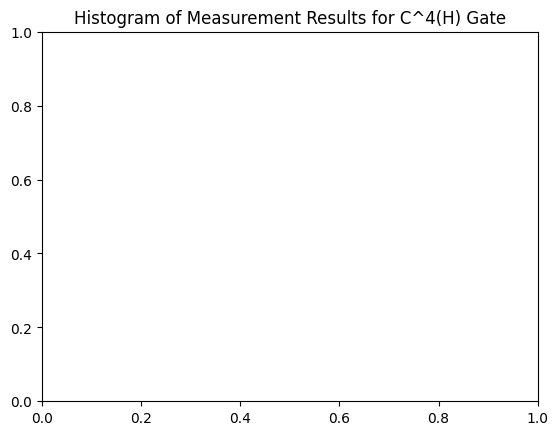

In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
import matplotlib.pyplot as plt
import numpy as np

# Define the V gate
def V():
    return np.array([[1/np.sqrt(2), 1j/np.sqrt(2)],
                     [1j/np.sqrt(2), 1/np.sqrt(2)]])

# Create the controlled-V gate
def controlled_V(control_qubits, target_qubit):
    qc = QuantumCircuit(len(control_qubits) + 1)
    for ctrl in control_qubits:
        qc.cx(ctrl, target_qubit)
    qc.append(UnitaryGate(V()), [target_qubit])
    for ctrl in control_qubits:
        qc.cx(ctrl, target_qubit)
    return qc

# Create the C^4(H) gate using controlled-V gates and ancilla qubits
def C4H():
    qc = QuantumCircuit(5)  # 4 controls and 1 target
    
    # Create ancilla qubits
    ancilla = [4]  # We use the fifth qubit as an ancilla
    
    # Apply controlled-V gates with ancilla qubits
    qc.append(controlled_V([0, 1, 2, 3], ancilla[0]), [0, 1, 2, 3, ancilla[0]])
    qc.h(ancilla[0])  # Apply Hadamard gate to ancilla qubit
    
    # Apply controlled-V gates again
    qc.append(controlled_V([0, 1, 2, 3], 4), [0, 1, 2, 3, 4])
    
    return qc

# Initialize the quantum circuit
qc = QuantumCircuit(5)
qc.x(0)  # Example initialization
qc.x(1)  # Example initialization
qc.x(2)  # Example initialization
qc.x(3)  # Example initialization

# Apply the C^4(H) gate
c4h = C4H()
qc.append(c4h, range(5))

# Measure all qubits
qc.measure_all()

# Print the quantum circuit for debugging
print("Quantum Circuit:\n")
print(qc)

# Transpile the circuit to optimize and adapt it to the backend
transpiled_circuit = transpile(qc, optimization_level=3)

# Print the transpiled circuit for debugging
print("\nTranspiled Circuit:\n")
print(transpiled_circuit)

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpiled_circuit, shots=1024)
result = job.result()

# Get the counts
counts = result.get_counts()

# Print the counts for debugging
print("\nCounts: ", counts)

# Plot the result
if counts:
    fig = plot_histogram(counts)
    plt.title('Histogram of Measurement Results for C^4(H) Gate')
    plt.show()
else:
    print("No results to display.")
